In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the processed dataset
train_data = pd.read_csv("../data/train_processed.csv")

# Ensure the Date column is in datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Display basic information
train_data.info()

# Preview the first few rows
train_data.head()


C:\Users\mohit\AppData\Local\Temp\ipykernel_13784\2081031738.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("../data/train_processed.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,NaN
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NaN


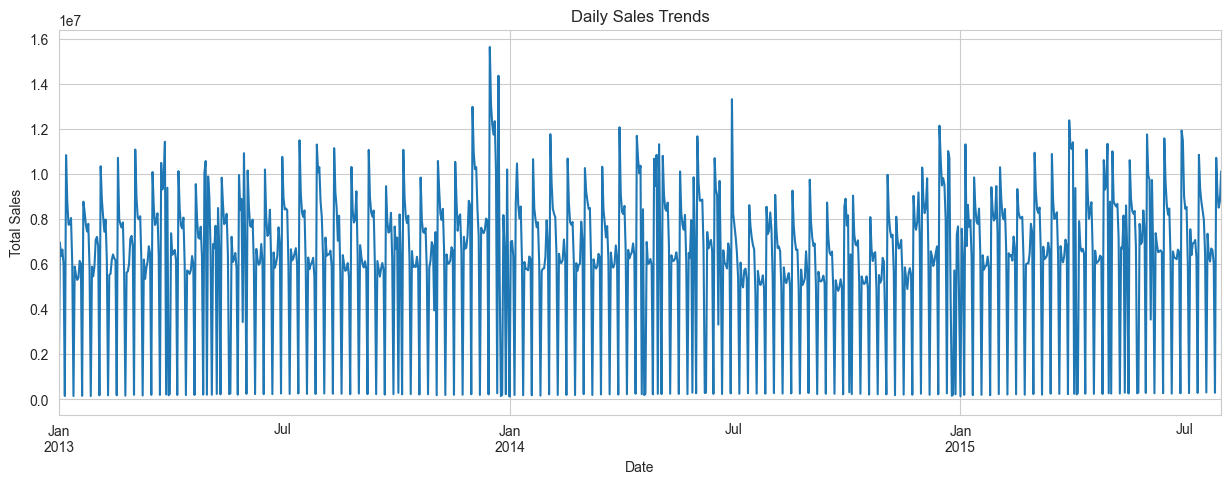

In [8]:
# Group sales by date
daily_sales = train_data.groupby('Date')['Sales'].sum()

# Plot daily sales trends
plt.figure(figsize=(15, 5))
daily_sales.plot(title="Daily Sales Trends", xlabel="Date", ylabel="Total Sales")
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_13784\2582831975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette="viridis")


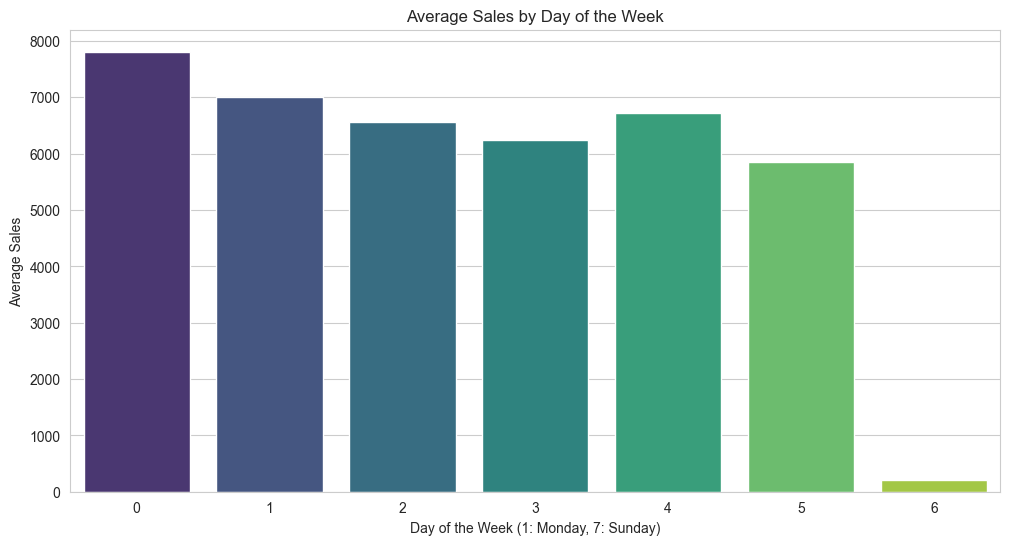

In [9]:
# Average sales by DayOfWeek
avg_sales_by_day = train_data.groupby('DayOfWeek')['Sales'].mean()

# Plot
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette="viridis")
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week (1: Monday, 7: Sunday)")
plt.ylabel("Average Sales")
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_13784\402208697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette="viridis")


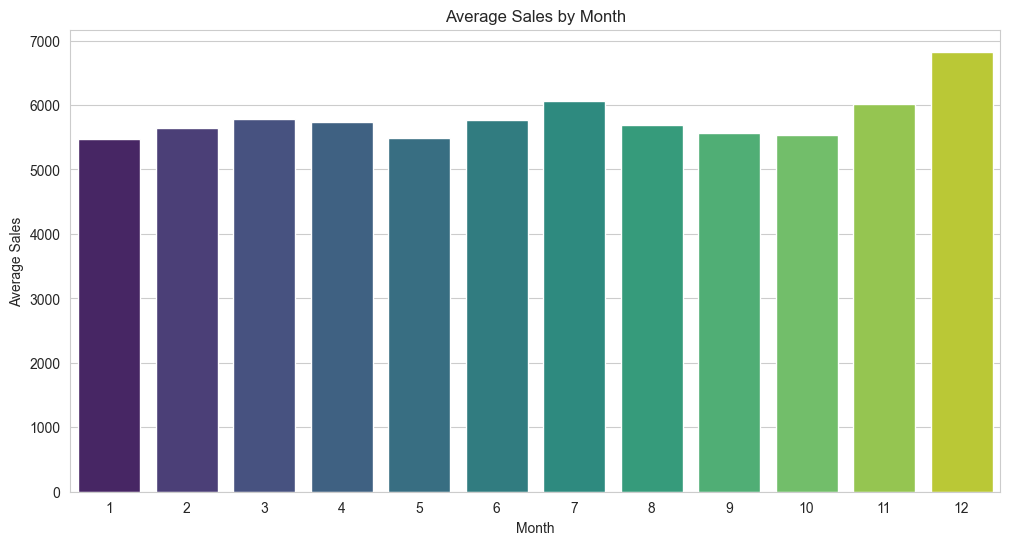

In [10]:
# Average sales by month
avg_sales_by_month = train_data.groupby('Month')['Sales'].mean()

# Plot
sns.barplot(x=avg_sales_by_month.index, y=avg_sales_by_month.values, palette="viridis")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_13784\2503488210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="muted")


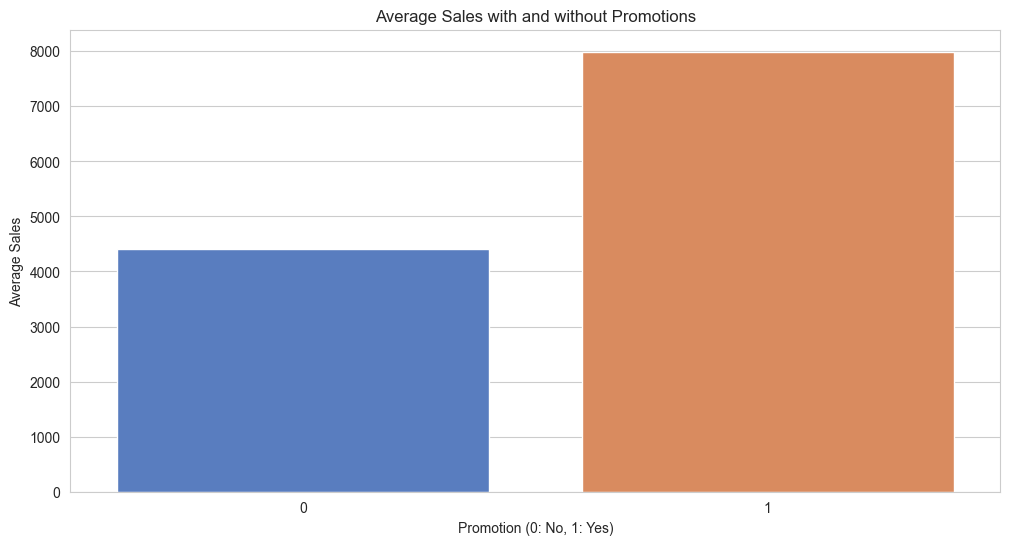

In [11]:
# Average sales with and without promotions
promo_sales = train_data.groupby('Promo')['Sales'].mean()

# Plot
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="muted")
plt.title("Average Sales with and without Promotions")
plt.xlabel("Promotion (0: No, 1: Yes)")
plt.ylabel("Average Sales")
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_13784\3117181321.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="muted")


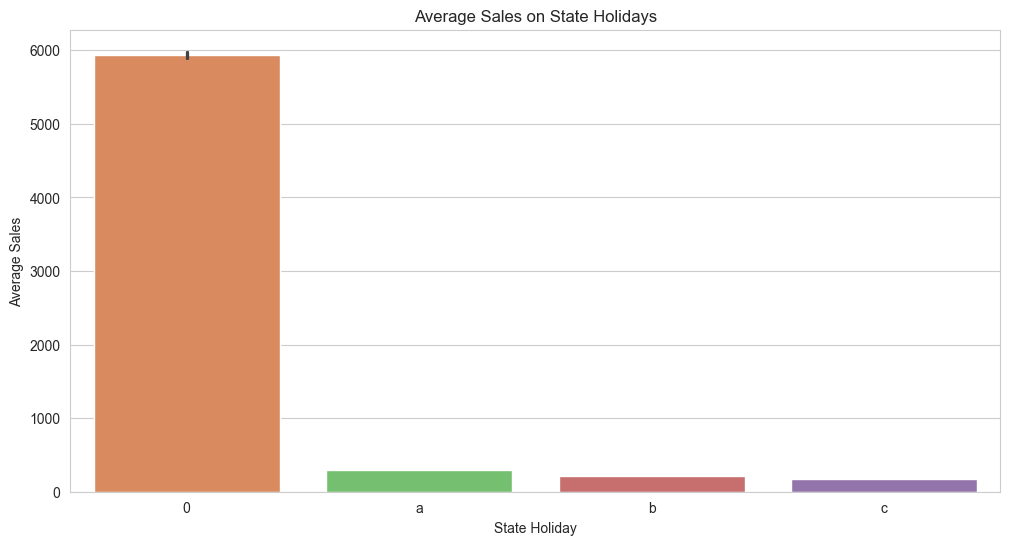

In [12]:
# Average sales on holidays
holiday_sales = train_data.groupby('StateHoliday')['Sales'].mean()

# Plot
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="muted")
plt.title("Average Sales on State Holidays")
plt.xlabel("State Holiday")
plt.ylabel("Average Sales")
plt.show()
